In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os
from scipy.stats import nbinom
import CRPS.CRPS as pscore

# set the feature and actuals year
feature_year = '2017'
actual_year = '2018'

current_dir = os.getcwd()

# relative paths to the parquet files
relative_path_features = os.path.join('..', 'data', 'cm_features_to_oct' + feature_year + '.parquet')
relative_path_actuals = os.path.join('..', 'data', 'cm_actuals_' + actual_year + '.parquet')

path_features = os.path.join(current_dir, relative_path_features)
path_actuals = os.path.join(current_dir, relative_path_actuals)

# import data
df_actuals = pd.read_parquet(path_actuals, engine='pyarrow')
df_features = pd.read_parquet(path_features, engine='pyarrow')

#setup pandas
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

## Analytics of the dataset
### Short depiction

In [2]:
#print data
# dataframe has an multi index
#df_actuals_18.loc[(482,)].transpose()
# print the fatalities of county one for all recorded months
a = df_features.xs(220, level="country_id")
b = a.loc[slice(396, 400), 'ged_sb']
print(np.mean(b))
print(np.var(b))
#df_features.xs(453, level="month_id")
array = np.array([300000, 400000,0])
print(np.var(array))
print(np.mean(array))

7070.8
11169648.16
28888888888.88889
233333.33333333334


In [3]:
df_features

gleditsch_ward  ged_sb  ged_ns  ged_os  acled_sb  \
month_id country_id                                                     
121      1                      110     0.0     0.0     0.0       0.0   
         2                      115     0.0     0.0     0.0       0.0   
         3                       52     0.0     0.0     0.0       0.0   
         4                      101     0.0     0.0    12.0       0.0   
         5                      990     0.0     0.0     0.0       0.0   
...                             ...     ...     ...     ...       ...   
454      242                    510     0.0     0.0     0.0       1.0   
         243                    600     0.0     0.0     0.0       0.0   
         244                    435     0.0     0.0     0.0       0.0   
         245                    625     0.0    36.0     1.0       7.0   
         246                    626    19.0     3.0     0.0     207.0   

                     acled_sb_count  acled_os  ged_sb_tsum_24  \
month_id country_id                                             
121      1                      0.0       0.0             0.0   
         2                      0.0       0.0             0.0   
         3                      0.0       0.0             0.0   
         4                      0.0       0.0             0.0   
         5                      0.0       0.0             0.0   
...                             ...       ...             ...   
454      242                    1.0       0.0             0.0   
         243                    0.0       0.0             0.0   
         244                    0.0       0.0             0.0   
         245                    5.0      39.0          1529.0   
         246                   38.0      66.0          1096.0   

                     wdi_sp_pop_totl  ged_sb_tlag_1  ged_sb_tlag_2  \
month_id country_id                                                  
121      1                  752897.0            0.0            0.0   
         2                  408360.0            0.0            0.0   
         3                 1256210.0            0.0            0.0   
         4                19275292.0            0.0            0.0   
         5                  167886.0            0.0            0.0   
...                              ...            ...            ...   
454      242              54401802.0            0.0            0.0   
         243              35107264.0            0.0            0.0   
         244               4051890.0            0.0            0.0   
         245              39377169.0           19.0            0.0   
         246              11066105.0           32.0           20.0   

                     ged_sb_tlag_3  ged_sb_tlag_4  ged_sb_tlag_5  \
month_id country_id                                                
121      1                     0.0            0.0            0.0   
         2                     0.0            0.0            0.0   
         3                     0.0            0.0            0.0   
         4                     0.0            0.0            0.0   
         5                     0.0            0.0            0.0   
...                            ...            ...            ...   
454      242                   0.0            0.0            0.0   
         243                   0.0            0.0            0.0   
         244                   0.0            0.0            0.0   
         245                   0.0            3.0           62.0   
         246                  33.0           32.0            4.0   

                     ged_sb_tlag_6  ged_os_tlag_1  wdi_ag_lnd_frst_k2  \
month_id country_id                                                     
121      1                     0.0            0.0            186021.5   
         2                     0.0            0.0            153776.3   
         3                     0.0            0.0              2420.6   
         4                     0.0            1.0            520

In [4]:
#print data
#df_features.tail(20)
df_features.xs(430, level="month_id")

,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,ged_sb_tlag_2,ged_sb_tlag_3,ged_sb_tlag_4,ged_sb_tlag_5,ged_sb_tlag_6,ged_os_tlag_1,wdi_ag_lnd_frst_k2,wdi_dt_oda_odat_pc_zs,wdi_ms_mil_xpnd_gd_zs,wdi_ms_mil_xpnd_zs,wdi_nv_agr_totl_kd,wdi_nv_agr_totl_kn,wdi_ny_gdp_pcap_kd,wdi_sp_dyn_le00_in,wdi_se_enr_prim_fm_zs,wdi_se_enr_prsc_fm_zs,wdi_se_prm_nenr,wdi_sh_sta_maln_zs,wdi_sh_sta_stnt_zs,wdi_sl_tlf_totl_fe_zs,wdi_sm_pop_refg_or,wdi_sm_pop_netm,wdi_sm_pop_totl_zs,wdi_sp_dyn_imrt_in,wdi_sh_dyn_mort_fe,wdi_sp_pop_14_fe_zs,wdi_sp_pop_1564_fe_zs,wdi_sp_pop_65up_fe_zs,wdi_sp_pop_grow,wdi_sp_urb_totl_in_zs,splag_wdi_sl_tlf_totl_fe_zs,splag_wdi_sm_pop_refg_or,splag_wdi_sm_pop_netm,splag_wdi_ag_lnd_frst_k2,vdem_v2x_delibdem,vdem_v2x_egaldem,vdem_v2x_libdem,vdem_v2x_libdem_48,vdem_v2x_partip,vdem_v2x_partipdem,vdem_v2x_accountability,vdem_v2x_civlib,vdem_v2x_clphy,vdem_v2x_cspart,vdem_v2x_divparctrl,vdem_v2x_edcomp_thick,vdem_v2x_egal,vdem_v2x_execorr,vdem_v2x_frassoc_thick,vdem_v2x_gencs,vdem_v2x_gender,vdem_v2x_genpp,vdem_v2x_horacc,vdem_v2x_neopat,vdem_v2x_pubcorr,vdem_v2x_rule,vdem_v2x_veracc,vdem_v2x_ex_military,vdem_v2x_ex_party,vdem_v2x_freexp,vdem_v2xcl_acjst,vdem_v2xcl_dmove,vdem_v2xcl_prpty,vdem_v2xcl_rol,vdem_v2xcl_slave,vdem_v2xdd_dd,vdem_v2xdl_delib,vdem_v2xeg_eqdr,vdem_v2xeg_eqprotec,vdem_v2xel_frefair,vdem_v2xel_regelec,vdem_v2xme_altinf,vdem_v2xnp_client,vdem_v2xnp_regcorr,vdem_v2xpe_exlecon,vdem_v2xpe_exlpol,vdem_v2xpe_exlgeo,vdem_v2xpe_exlgender,vdem_v2xpe_exlsocgr,vdem_v2xps_party,vdem_v2xcs_ccsi,vdem_v2xnp_pres,vdem_v2xeg_eqaccess,vdem_v2x_diagacc,vdem_v2clrgunev,splag_vdem_v2x_libdem,splag_vdem_v2xcl_dmove,splag_vdem_v2x_accountability,splag_vdem_v2xpe_exlsocgr,splag_vdem_v2xcl_rol,_wdi_sm_pop_netm,_wdi_sp_dyn_imrt_in,decay_ged_sb_5,decay_ged_os_5,decay_ged_sb_100,decay_ged_sb_500,decay_ged_os_100,decay_ged_ns_5,decay_ged_ns_100,decay_acled_sb_5,decay_acled_os_5,decay_acled_ns_5,agr_withdrawal_pct_t48,dam_cap_pcap_t48,groundwater_export_t48,fresh_withdrawal_pct_t48,ind_efficiency_t48,irr_agr_efficiency_t48,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5
country_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,751115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184730.50,213.828775,1.276332,4.089110,1.054639e+09,2.366710e+11,5659.075248,67.882,0.96393,0.99501,93.09037,8.2,11.3,37.717817,700.0,-6715.0,1.742323,28.1,29.7,29.420754,64.989058,5.590188,0.493149,26.414,121.899946,9003.0,-38464.0,5675326.88,0.369,0.429,0.394,0.381,0.557,0.379,0.870,0.789,0.647,0.754,1.085,0.709,0.653,0.671,0.884,0.864,0.876,0.977,-0.124,0.534,0.570,0.475,0.939,0.045,0.136,0.752,0.696,0.864,0.882,0.757,0.718,0.013,0.535,0.661,0.682,0.667,0.847,0.781,0.503,0.621,0.492,0.595,0.432,0.399,0.603,0.670,0.915,0.367,0.652,1.058,0.697,1.539,2.606,2.785,0.947,2.212,-6715.0,28.1,0.000004,0.081052,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.502952,1076.023765,0.00,0.533100,40.304150,0.150994,19.148548,1.524064,3.298402,320466.791130,360358.922806,0.000374,1.057408,1.315025
2,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,569682.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152613.08,23.504342,0.000000,0.000000,5.118440e+08,1.748817e+09,9316.114241,69.782,1.01702,1.15494,86.34084,5.8,8.8,39.873296,17.0,-967.0,7.664516,18.7,18.4,28.429303,64.401005,7.169693,1.011803,66.089,79.934959,1677.0,18225.0,5238970.30,0.626,0.574,0.644,0.658,0.564,0.487,1.351,0.885,0.871,0.759,1.026,0.828,0.715,0.219,0.903,0.816,0.822,0.851,1.026,0.224,0.395,0.757,1.151,0.400,0.000,0.882,0.864,0.879,0.847,0.859,0.650,0.020,0.809,0.673,0.748,0.822,0.924,0.874,0.417,0.218,0.481,0.419,0.366,0.397,0.499,0.812,0.951,0.148,0.748,1.501,0.962,1.188,1.761,2.602,0.776,1.623,-967.0,18.7,0.000004,0.000004

In [5]:
#summary of feature dataset
df_features.describe()

,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,ged_sb_tlag_2,ged_sb_tlag_3,ged_sb_tlag_4,ged_sb_tlag_5,ged_sb_tlag_6,ged_os_tlag_1,wdi_ag_lnd_frst_k2,wdi_dt_oda_odat_pc_zs,wdi_ms_mil_xpnd_gd_zs,wdi_ms_mil_xpnd_zs,wdi_nv_agr_totl_kd,wdi_nv_agr_totl_kn,wdi_ny_gdp_pcap_kd,wdi_sp_dyn_le00_in,wdi_se_enr_prim_fm_zs,wdi_se_enr_prsc_fm_zs,wdi_se_prm_nenr,wdi_sh_sta_maln_zs,wdi_sh_sta_stnt_zs,wdi_sl_tlf_totl_fe_zs,wdi_sm_pop_refg_or,wdi_sm_pop_netm,wdi_sm_pop_totl_zs,wdi_sp_dyn_imrt_in,wdi_sh_dyn_mort_fe,wdi_sp_pop_14_fe_zs,wdi_sp_pop_1564_fe_zs,wdi_sp_pop_65up_fe_zs,wdi_sp_pop_grow,wdi_sp_urb_totl_in_zs,splag_wdi_sl_tlf_totl_fe_zs,splag_wdi_sm_pop_refg_or,splag_wdi_sm_pop_netm,splag_wdi_ag_lnd_frst_k2,vdem_v2x_delibdem,vdem_v2x_egaldem,vdem_v2x_libdem,vdem_v2x_libdem_48,vdem_v2x_partip,vdem_v2x_partipdem,vdem_v2x_accountability,vdem_v2x_civlib,vdem_v2x_clphy,vdem_v2x_cspart,vdem_v2x_divparctrl,vdem_v2x_edcomp_thick,vdem_v2x_egal,vdem_v2x_execorr,vdem_v2x_frassoc_thick,vdem_v2x_gencs,vdem_v2x_gender,vdem_v2x_genpp,vdem_v2x_horacc,vdem_v2x_neopat,vdem_v2x_pubcorr,vdem_v2x_rule,vdem_v2x_veracc,vdem_v2x_ex_military,vdem_v2x_ex_party,vdem_v2x_freexp,vdem_v2xcl_acjst,vdem_v2xcl_dmove,vdem_v2xcl_prpty,vdem_v2xcl_rol,vdem_v2xcl_slave,vdem_v2xdd_dd,vdem_v2xdl_delib,vdem_v2xeg_eqdr,vdem_v2xeg_eqprotec,vdem_v2xel_frefair,vdem_v2xel_regelec,vdem_v2xme_altinf,vdem_v2xnp_client,vdem_v2xnp_regcorr,vdem_v2xpe_exlecon,vdem_v2xpe_exlpol,vdem_v2xpe_exlgeo,vdem_v2xpe_exlgender,vdem_v2xpe_exlsocgr,vdem_v2xps_party,vdem_v2xcs_ccsi,vdem_v2xnp_pres,vdem_v2xeg_eqaccess,vdem_v2x_diagacc,vdem_v2clrgunev,splag_vdem_v2x_libdem,splag_vdem_v2xcl_dmove,splag_vdem_v2x_accountability,splag_vdem_v2xpe_exlsocgr,splag_vdem_v2xcl_rol,_wdi_sm_pop_netm,_wdi_sp_dyn_imrt_in,decay_ged_sb_5,decay_ged_os_5,decay_ged_sb_100,decay_ged_sb_500,decay_ged_os_100,decay_ged_ns_5,decay_ged_ns_100,decay_acled_sb_5,decay_acled_os_5,decay_acled_ns_5,agr_withdrawal_pct_t48,dam_cap_pcap_t48,groundwater_export_t48,fresh_withdrawal_pct_t48,ind_efficiency_t48,irr_agr_efficiency_t48,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5
count,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,6.247400e+04,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,6.247400e+04,62474.000000,62474.000000,62474.000000,6.247400e+04,6.247400e+04,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,6.247400e+04,6.247400e+04,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,6.247400e+04,6.247400e+04,6.247400e+04,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,6.247400e+04,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000,62474.000000
mean,473.143516,21.887761,3.139898,13.576768,10.858773,1.49

### Histogram of the state based deaths

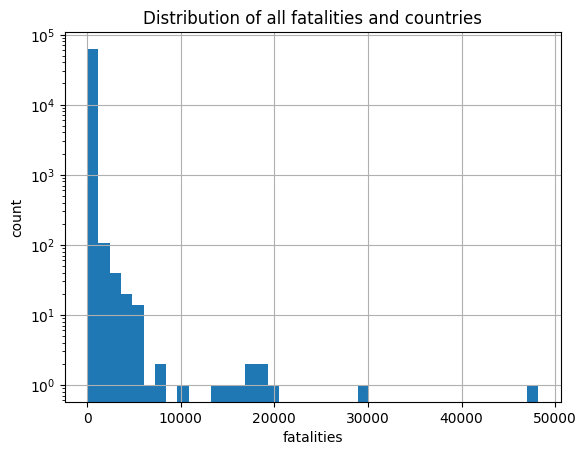

In [6]:
# empirical distribution of all state based fatalities
df_features['ged_sb'].hist(bins=40)
plt.title('Distribution of all fatalities and countries')
plt.xlabel('fatalities')
plt.ylabel('count')
plt.yscale("log") 
plt.show()

### Lag-distribution and correlation matrix for ged_sb

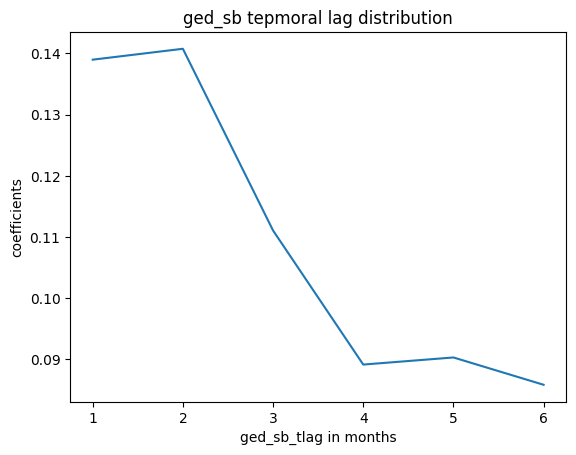

In [7]:
# lag distribution for temporal ged_sb
# ols regression test
y = df_features.loc[:,'ged_sb']
X = df_features.iloc[:, 9:15] # all columns from column 5 (index 4)
X = sm.add_constant(X) # intercept
ged_lag_model = sm.OLS(y, X)
ged_lag_results = ged_lag_model.fit()


coef = ged_lag_results.params[1:]
n_coef = len(coef)

index = np.arange(start=1,stop=n_coef+1)

# create plot
plt.plot(index, coef)
plt.xlabel('ged_sb_tlag in months')
plt.ylabel('coefficients')
plt.title('ged_sb tepmoral lag distribution')
plt.show()


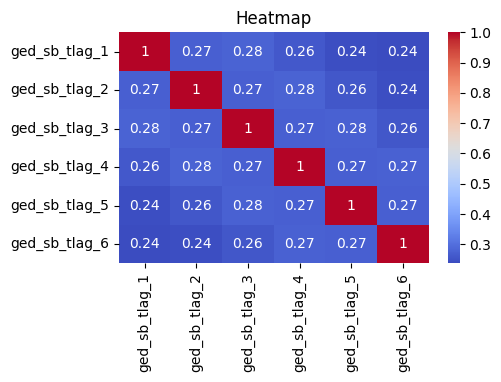

In [8]:
# correlation matrix for ged_sb_tlag variables
# correlationmatrix -> hier alle features einer gruppe (lagged) mit der zielvariable!!
corr_matrix_ged_tlag = df_features.iloc[:, 9:15].corr().abs()

# heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix_ged_tlag, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

## Data processing
### Drop features with high correlation

In [9]:
# correlation matrix -> hier alle features einer gruppe (lagged) mit der zielvariable!!
corr_matrix_all = df_features.iloc[:, 4:].corr().abs()

# select upper triangle of correlation matrix
upper = corr_matrix_all.where(np.triu(np.ones(corr_matrix_all.shape), k=1).astype(bool))

# find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# drop features 
df_features.drop(to_drop, axis=1, inplace=True)

print("Dropped features:")
to_drop

Dropped features:


['wdi_sh_dyn_mort_fe',
 'vdem_v2x_egaldem',
 'vdem_v2x_libdem',
 'vdem_v2x_libdem_48',
 'vdem_v2x_partipdem',
 'vdem_v2x_gender',
 'vdem_v2x_freexp',
 'vdem_v2xcl_rol',
 'vdem_v2xeg_eqprotec',
 'vdem_v2xme_altinf',
 'vdem_v2xnp_regcorr',
 'vdem_v2xcs_ccsi',
 'vdem_v2xnp_pres',
 'vdem_v2x_diagacc',
 'splag_vdem_v2xcl_rol',
 '_wdi_sm_pop_netm',
 '_wdi_sp_dyn_imrt_in',
 'fresh_withdrawal_pct_t48',
 'water_stress_t48',
 'renewable_pcap_t48']

### Normalize and group data 

In [10]:
# normalize features
#df_features.iloc[:,4:] = df_features.iloc[:,4:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

# group by country_id
grouped_features = df_features.groupby('country_id')
grouped_actuals = df_actuals.groupby('country_id')


### Countries with conflict related deaths

In [11]:
nonzero_string = ''
nonzero_list = []

for name, country in grouped_features:
    country_id = country.index[0][1]
    if np.count_nonzero(country.loc[:,'ged_sb']) > 0:
        nonzero_list.append({'country_id': country_id, 'nonzero_months': np.count_nonzero(country.loc[:,'ged_sb'])})        
    
nonzero_list_sorted = sorted(nonzero_list, key=lambda d: d['nonzero_months'], reverse=False)
df_nonzero = pd.DataFrame(nonzero_list_sorted)
print('Dataframe with the number of nonzero months')
#df_nonzero.iloc[40:60,:]
df_nonzero.tail(10)

Dataframe with the number of nonzero months


,country_id,nonzero_months
95,218,236
96,65,238
97,60,245
98,149,245
99,96,296
100,67,305
101,28,310
102,145,315
103,133,328
104,223,333


## Baseline prediction models
### negBin 6 months average
#### Histogram and mean-variance-plot for country X

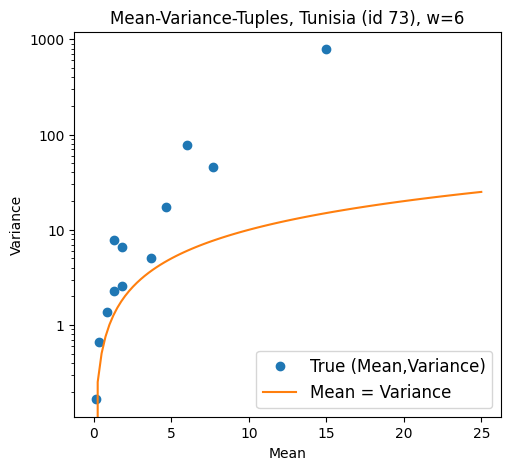

In [37]:
from matplotlib.ticker import ScalarFormatter

# set country
country_id = 73 #223, 133, 145, 28, 67, 96, 60, 149, 65

""" # histogram
grouped_features.get_group(country_id).loc[:,'ged_sb'].hist(bins=40)
plt.title('Empirical distribution of sb deaths in id=' + str(country_id))
plt.xlabel('fatalties')
plt.ylabel('count')
plt.show() """

# mean vs. variance for x month groups
monthGroupBy = 6 # used for distribution estimation as well (next codeblock)
drop_x_months = len(grouped_features.get_group(country_id).index.get_level_values('month_id')) % monthGroupBy
df_months_dropped = grouped_features.get_group(country_id).drop(grouped_features.get_group(country_id).index.levels[0][0:drop_x_months-1], axis=0, level='month_id')

mean_var_list = []
ged_sb_index = df_months_dropped.columns.get_loc('ged_sb')

for index , chunk in enumerate(np.array_split(df_months_dropped, len(df_months_dropped)//monthGroupBy)):
    mean_var_list.append({'mu':chunk.iloc[:,ged_sb_index].mean(),
                         'sd_sqd':chunk.iloc[:,ged_sb_index].var(),
                         'month_group':index})

# sort data regarding 'mu' (ascending)
mean_var_list = sorted(mean_var_list, key=lambda x: x['mu'])

# extract 'mu' und 'sd' in separate arrays
mus = [d['mu'] for d in mean_var_list]
sds = [d['sd_sqd'] for d in mean_var_list]

# origin straight
x = np.linspace(0, max(mus) + 10, 100)
y = x

# plot data and origin straight
fig, ax = plt.subplots(figsize=(5.5, 5))
ax.plot(mus, sds, 'o', label='True (Mean,Variance)')  # Füge ein Label für die Punkte hinzu
ax.plot(x, y, '-', label='Mean = Variance')  # Füge ein Label für die Linie hinzu

plt.yscale('log')
plt.title('Mean-Variance-Tuples, Tunisia (id 73), w=' + str(monthGroupBy))
#plt.title('Mean-Variance-Tuples, Mali (id 50), w=' + str(monthGroupBy))
#plt.title('Mean-Variance-Tuples, Somalia (id 120), w=' + str(monthGroupBy))
plt.xlabel('Mean')
plt.ylabel('Variance')



# Verwende ScalarFormatter für die y-Achse
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.legend(loc='lower right', fontsize=12)  # Erstelle die Legende

# Zeige das Diagramm
plt.show()



In [13]:
# negative binomial distribution for the country defined in the upper codeblock
NB_quantile_dict = {'quantile':[],'country_id':0, 'fatalities':[]}

# calculate n (r) and p via average/variance
country_mean = pd.Series.mean(grouped_features.get_group(country_id).tail(monthGroupBy).loc[:,'ged_sb'])
country_var = pd.Series.var(grouped_features.get_group(country_id).tail(monthGroupBy).loc[:,'ged_sb'])

n = (country_mean**2)/(country_var-country_mean) # equivalent to r
p = country_mean/country_var

dummy_fatalities_list = []
dummy_quantile_list = []

# compute all quantiles from 0.1% to 99.9%
for i in range(10, 9999, 10):
    dummy_fatalities_list.append(nbinom.ppf(i/10000, n, p))
    dummy_quantile_list.append(str((i/10000)*100)+'%')

NB_quantile_dict['quantile'] = dummy_quantile_list
NB_quantile_dict['country_id'] = country_id
NB_quantile_dict['fatalities'] = dummy_fatalities_list

## create dataframe
NB_prediction = pd.DataFrame(NB_quantile_dict)
NB_prediction = NB_prediction.set_index(['quantile', 'country_id'])
NB_prediction

,,fatalities
quantile,country_id,
0.1%,50,5.0
0.2%,50,6.0
0.3%,50,7.0
0.4%,50,7.0
0.5%,50,8.0
...,...,...
99.5%,50,71.0
99.6%,50,72.0
99.7%,50,74.0


### Proper scoring rule: CRPS

In [14]:
# prediction window 's'
s = 3

true_obs = grouped_actuals.get_group(country_id).iloc[3-s,0]
crps = pscore(NB_prediction.loc[:,'fatalities'].to_numpy(),true_obs).compute()[0]
print("CRPS: " + str(np.round(crps, decimals=3)))
#pscore(np.array([true_obs]),true_obs).compute()[0]

CRPS: 32.987


## negBin Regression (aktuell noch OLS!!)
### Reduce number of independent variables

In [15]:
# drop variables for small regression modell
drop_list_reduced = list(df_features.loc[:,'ged_sb_tlag_2':'ged_sb_tlag_6'].columns.values) 
drop_list_reduced.extend(list(df_features.loc[:,'decay_ged_sb_5':'decay_acled_ns_5'].columns.values))
#drop_list_reduced.extend(list(df_features.loc[:,'splag_1_decay_ged_sb_5':'splag_1_decay_ged_ns_5'].columns.values))

df_features_reduced = df_features.drop(drop_list_reduced, axis=1)

grouped_features_reduced = df_features_reduced.groupby('country_id')

#grouped_features_reduced.groups.keys()

In [16]:
# regression for the different countries
ols_fit_dict = {}

for name, country in grouped_features_reduced:
    # country must have at least one month of death data
    if len(country.index) > 1:
        ged_sb_index = country.columns.get_loc('ged_sb')
        acled_os_index = country.columns.get_loc('acled_os')
        namestring = 'country_' + str(name)
        
        y = country.iloc[:-1,ged_sb_index]
        # use all but the last month
        X = country.iloc[:-1, acled_os_index:] # all columns from 'acled_os'
        X = sm.add_constant(X, has_constant='add')
        ols_model = sm.OLS(y, X)
        ols_results = ols_model.fit()
        ols_fit_dict[namestring] = ols_results

#print(ols_fit_dict['country_59'].summary())


In [17]:
# ols prediction for the different countries and following poisson sampling
ols_pois_dist_dict = {}

for name, country in grouped_features:
    # country must have at least one month of death data
    if len(country.index) > 1:
        #ged_sb_index = country.columns.get_loc('ged_sb')
        acled_os_index = country.columns.get_loc('acled_os')
        namestring = 'country_' + str(name)
        # lambda predicted via the test dataset and the estimated coefficients of the linear models
        coefficients = ols_fit_dict[namestring].params.values[1:]

        # Extract the intercept from the regression model
        intercept = ols_fit_dict[namestring].params.values[0]
        
        # Extract the values of the independent variables from the last recorded month (test month)
        x_values = grouped_features_reduced.get_group(name).iloc[-1, acled_os_index:].squeeze(axis=0)

        # Calculate the predicted value using the formula: y = b0 + b1*x1 + b2*x2 + ... + bn*xn
        predicted_value = intercept + np.dot(coefficients, x_values)
        # sample poisson distribution with lambda=max(0,predicted_value)
        ols_pois_dist_dict[namestring] = np.random.poisson(lam = max(0,predicted_value), size = 100)

ols_pois_dist_predict_grouped = pd.DataFrame(ols_pois_dist_dict)
ols_pois_dist_predict_grouped


,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_16,country_17,country_18,country_19,country_20,country_21,country_22,country_23,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33,country_34,country_35,country_36,country_37,country_38,country_39,country_40,country_41,country_42,country_43,country_45,country_46,country_47,country_48,country_49,country_50,country_52,country_53,country_54,country_55,country_56,country_57,country_58,country_59,country_60,country_62,country_63,country_64,country_65,country_66,country_67,country_69,country_70,country_73,country_74,country_76,country_77,country_78,country_79,country_80,country_81,country_82,country_83,country_84,country_85,country_86,country_87,country_89,country_90,country_92,country_93,country_94,country_96,country_97,country_98,country_99,country_100,country_101,country_102,country_103,country_104,country_105,country_107,country_108,country_109,country_110,country_111,country_112,country_113,country_114,country_115,country_116,country_117,country_118,country_119,country_120,country_121,country_122,country_123,country_124,country_125,country_126,country_127,country_128,country_129,country_130,country_131,country_132,country_133,country_134,country_135,country_136,country_137,country_138,country_139,country_140,country_142,country_143,country_144,country_145,country_146,country_147,country_148,country_149,country_150,country_151,country_152,country_153,country_154,country_155,country_156,country_157,country_158,country_159,country_160,country_161,country_162,country_163,country_164,country_165,country_166,country_167,country_168,country_169,country_170,country_171,country_172,country_173,country_174,country_176,country_177,country_178,country_179,country_180,country_181,country_182,country_183,country_184,country_185,country_186,country_187,country_188,country_189,country_191,country_192,country_196,country_197,country_198,country_199,country_205,country_206,country_208,country_209,country_213,country_214,country_218,country_220,country_222,country_223,country_227,country_230,country_231,country_232,country_233,country_234,country_235,country_236,country_237,country_239,country_240,country_242,country_243,country_244,country_245,country_246,country_247
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,28,0,0,0,0,44,0,0,34,823,0,0,0,5,0,13,8,2,0,0,0,0,18,211,0,0,0,0,0,0,0,0,0,0,0,0,6,43,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,10,0,0,169,0,0,1,104,0,0,0,9,0,0,1,0,1971,1,0,0,0,5,0,0,0,0,0,168,0,0,6,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,22,348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350,0,0,0,0,0,0,0,0,0,0,0,54,0,0,1042,32,59,81,0,0,0,0,0,0,0,8,0,699,0,0,0,39,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,17,0,0,0,0,43,0,0,48,822,0,0,0,0,0,16,11,3,0,0,0,0,14,193,0,0,0,0,0,0,0,0,0,0,0,0,20,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,176,0,0,1,88,0,0,0,3,0,0,2,0,1821,0,0,0,0,6,0,0,0,0,0,159,0,0,6,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,17,356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,374,0,0,0,0,0,0,1,0,0,0,0,65,0,0,1144,46,69,88,0,0,0,0,0,0,0,19,0,648,0,0,0,49,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,26,0,0,0,0,53,0,0,43,743,0,0,0,2,0,16,30,4,0,0,0,0,13,178,0,0,0,0,0,0,0,0,0,0,0,0,11,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,150,0,0,0,93,0,0,0,7,0,0,1,0,1957,0,0,0,0,4,0,0,0,0,0,180,0,0,4,5,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,38,20,381,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,329,0,0,0,0,0,0,1,0,0,0,0,61,0,0,1081,26,53,98,0,0,0,0,0,0,0,11,0,646,0,0,0,51,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,29,0,0,0,0,61,0,0,38,811,0,0,0,3,0,15,9,3,0,0,0,0,17,201,0,0,0,0,0,0,0,0,0,0,0,0,13,35,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,23,0,0,152,0,

### Abbreviations explanation
* **cm** country-month level: prediction with global coverage
* *pgm* PRIO-grid-month level: prediction on the sub-national level for Africa and the middle East


* **sb** = state based: contested incompatibility that
concerns government and/or territory where the use of armed force between two parties, of which at least
one is the government of a state, results in at least 25 battle-related deaths in one calendar year 

*the **fatality counts** in sb conflicts is the target variable of the prediction!*
* *os* = one-sided:  deliberate use of armed force by the government of a state or by a
formally organized group against civilians which result in at least 25 BRDs in a year
* *ns* = non-state:  use of armed force by two formally organized group, none of which is
the government of a state, which result in at least 25 BRDs in a year